# Lending Club Case Study - Exploratory Data Analysis


##### Group Members: 
1. Nikhil Oommen Jacob
2. Ragula Srinivas

## Project Brief
Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Business Understanding

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

 

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

 

In this case study, you will use EDA to understand how <b>consumer attributes</b> and <b>loan attributes</b> influence the tendency of default.


<p>
<img src ="https://cdn.upgrad.com/UpGrad/temp/7afbce98-8ecc-41c6-96d8-981cba7d343f/Loan_image.png" alt='Figure 1'>
<center> <b>Figure 1. Loan Data Set</b> </center> 
 </br>  
</p>

When a person applies for a loan, there are <b>two types of decisions</b> that could be taken by the company:


1. <b>Loan accepted:</b> If the company approves the loan, there are 3 possible scenarios described below:

    - <b>Fully paid:</b> Applicant has fully paid the loan (the principal and the interest rate)
    - <b>Current:</b> Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
    -  <b>Charged-off:</b> Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 
<p></p>
2. <b>Loan rejected:</b>The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)


## Business Objectives 
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who <b>default</b> cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the <b>driving factors (or driver variables)</b> behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

## Importing packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(style='whitegrid')

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Data understanding

In [4]:
#Reading the data set
loan = pd.read_csv('loan.csv',encoding = "ISO-8859-1", low_memory=False)

In [5]:
loan.shape

(39717, 111)

In [7]:
#Setting Option for Display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [8]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [9]:
#Checking the percentage of Missing value in the Data Set

round(loan.isnull().sum()/len(loan.index), 2)*100

id                                0.0  
member_id                         0.0  
loan_amnt                         0.0  
funded_amnt                       0.0  
funded_amnt_inv                   0.0  
term                              0.0  
int_rate                          0.0  
installment                       0.0  
grade                             0.0  
sub_grade                         0.0  
emp_title                         6.0  
emp_length                        3.0  
home_ownership                    0.0  
annual_inc                        0.0  
verification_status               0.0  
issue_d                           0.0  
loan_status                       0.0  
pymnt_plan                        0.0  
url                               0.0  
desc                              33.0 
purpose                           0.0  
title                             0.0  
zip_code                          0.0  
addr_state                        0.0  
dti                               0.0  


## Data Cleaning

In [12]:
# removing the columns having more than 60% missing values

missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 60]
print(missing_columns)

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [13]:
#dropping the columns having more than 60% missing values

loan = loan.drop(missing_columns, axis=1)
print(loan.shape)

(39717, 54)


In [14]:
# Updated number of missing values

100*(loan.isnull().sum()/len(loan.index))

id                            0.000000 
member_id                     0.000000 
loan_amnt                     0.000000 
funded_amnt                   0.000000 
funded_amnt_inv               0.000000 
term                          0.000000 
int_rate                      0.000000 
installment                   0.000000 
grade                         0.000000 
sub_grade                     0.000000 
emp_title                     6.191303 
emp_length                    2.706650 
home_ownership                0.000000 
annual_inc                    0.000000 
verification_status           0.000000 
issue_d                       0.000000 
loan_status                   0.000000 
pymnt_plan                    0.000000 
url                           0.000000 
desc                          32.580507
purpose                       0.000000 
title                         0.027696 
zip_code                      0.000000 
addr_state                    0.000000 
dti                           0.000000 


In [15]:
#Analysing the data type of the columns in dataframe
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [16]:
# unique values
# We will remove all columns where number of unique value is only 1 because that will not make any sense in the analysis.
loan.nunique()

id                            39717
member_id                     39717
loan_amnt                     885  
funded_amnt                   1041 
funded_amnt_inv               8205 
term                          2    
int_rate                      371  
installment                   15383
grade                         7    
sub_grade                     35   
emp_title                     28820
emp_length                    11   
home_ownership                5    
annual_inc                    5318 
verification_status           3    
issue_d                       55   
loan_status                   3    
pymnt_plan                    1    
url                           39717
desc                          26527
purpose                       14   
title                         19615
zip_code                      823  
addr_state                    50   
dti                           2868 
delinq_2yrs                   11   
earliest_cr_line              526  
inq_last_6mths              

In [17]:
#removing all cloumns where number of unique values is 1
for col in loan.columns:
    if len(loan[col].unique()) == 1:
        loan.drop(col,inplace=True,axis=1)
        

In [18]:
#Checking again if there are any cloumns left with less than 2 unique values
loan.nunique()

id                            39717
member_id                     39717
loan_amnt                     885  
funded_amnt                   1041 
funded_amnt_inv               8205 
term                          2    
int_rate                      371  
installment                   15383
grade                         7    
sub_grade                     35   
emp_title                     28820
emp_length                    11   
home_ownership                5    
annual_inc                    5318 
verification_status           3    
issue_d                       55   
loan_status                   3    
url                           39717
desc                          26527
purpose                       14   
title                         19615
zip_code                      823  
addr_state                    50   
dti                           2868 
delinq_2yrs                   11   
earliest_cr_line              526  
inq_last_6mths                9    
open_acc                    

In [19]:
#removing columns which are not impacting our target variable i.e loan status. 

loan = loan.drop(['delinq_2yrs', 'inq_last_6mths', 'open_acc','pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
                  'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
                  'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d','collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens','id', 'member_id',
                                 'url', 'zip_code', 'desc','pub_rec_bankruptcies','earliest_cr_line'
                 ], axis = 1)

In [20]:
loan.shape

(39717, 19)

In [21]:
#removing all the rows with loan_status as "Current" since these are not relevant to our analysis
loan = loan[loan['loan_status']!= 'Current']

In [22]:
#checking the shape again
loan.shape

(38577, 19)

In [23]:
loan.isnull().sum()*100/loan.shape[0]

loan_amnt              0.000000
funded_amnt            0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_title              6.185033
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
title                  0.028514
addr_state             0.000000
dti                    0.000000
dtype: float64

As can be seen, default ratio consistently increases from best grades to worst grades. It confirms that we incur the ration of defautlters increases with with loans of bad grades . Next, we will go further by breaking down grades into subgrades

In [25]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_title            36191 non-null  object 
 9   emp_length           37544 non-null  object 
 10  home_ownership       38577 non-null  object 
 11  annual_inc           38577 non-null  float64
 12  verification_status  38577 non-null  object 
 13  issue_d              38577 non-null  object 
 14  loan_status          38577 non-null  object 
 15  purpose              38577 non-null 

In [26]:
#removing % and changing int rate to float

loan.int_rate=loan.int_rate.astype(str).str.rstrip('%').astype('float')

#converting columns to numeric
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']

loan[numeric_columns] = loan[numeric_columns].apply(pd.to_numeric)

In [27]:
#converting issue date to date time
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')

In [28]:
loan['issue_d_month'] = loan['issue_d'].dt.month
loan['issue_d_year'] = loan['issue_d'].dt.year

<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

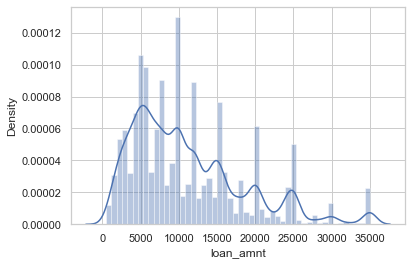

In [29]:
#checking distrbution of loan amount
sns.distplot(loan.loan_amnt)

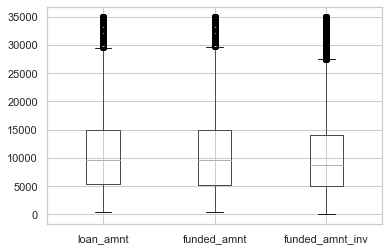

In [30]:
#checking if there are any outliers in the columns containing numerical values
loan.boxplot(column=['loan_amnt','funded_amnt','funded_amnt_inv']);


We need to remove these outliers. We will similarly plot boxplots for other columns containing numerical values.

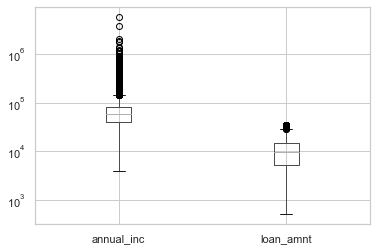

In [31]:
plt.yscale('log')
loan.boxplot(column=['annual_inc','loan_amnt']);

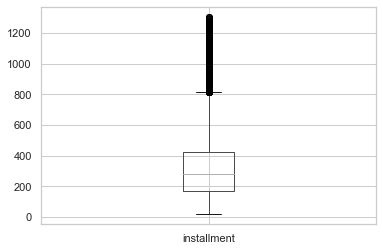

In [32]:
loan.boxplot(column=['installment']);

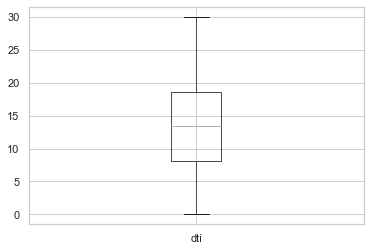

In [33]:
loan.boxplot(column=['dti']);

There are no outliers in dti

In [34]:
#removing rows from annual_inc after 99.5 percentile
loan = loan[loan["annual_inc"] < loan["annual_inc"].quantile(0.995)]
loan["annual_inc"].describe()

count    38359.000000 
mean     66156.572040 
std      37321.342395 
min      4000.000000  
25%      40000.000000 
50%      58000.000000 
75%      81000.000000 
max      294000.000000
Name: annual_inc, dtype: float64

Max value is 294000 which is approx 4 times more than mean value, so we will remove the outliers from Annual Income.
Remove Outliers (values from 99 to 100%)


In [35]:
#removing rows from "installment" after 99.5 percentile
loan = loan[loan["installment"] < loan["installment"].quantile(0.995)]
loan["installment"].describe()

count    38166.000000
mean     316.963098  
std      199.038751  
min      15.690000   
25%      165.262500  
50%      276.060000  
75%      419.715000  
max      1049.310000 
Name: installment, dtype: float64

Max value is 1059 which is approx 3 times more than mean value, so we will remove the outliers from Installment. Remove Outliers (values from 99 to 100%)

In [36]:
# Purpose of loan
(loan.purpose.value_counts()*100)/len(loan)

debt_consolidation    46.803438
credit_card           13.053503
other                 10.058691
home_improvement      7.352093 
major_purchase        5.593984 
small_business        4.511869 
car                   3.922339 
wedding               2.405282 
medical               1.771210 
moving                1.496096 
vacation              0.982550 
house                 0.938008 
educational           0.848923 
renewable_energy      0.262013 
Name: purpose, dtype: float64

## Data Analysis

**a. Univariate Analysis**

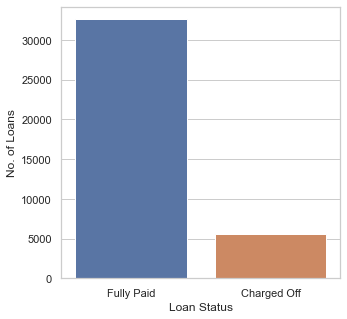

In [38]:
#count plot for loan status
plt.figure(figsize=(5,5))
ax = sns.countplot(x="loan_status", data=loan)
ax.set(xlabel='Loan Status', ylabel='No. of Loans')
plt.show()

Insights from the above graph: <br>
1. More than 30000 loans are fully paid. <br>
2. Around 5000 loans are charged off.

**Employee_Length vs Count of charged off loans**

In [39]:
#making a new dataframe for loans where status is charged off
charged_off_loans=loan.loc[loan['loan_status']=='Charged Off']
charged_off_loans['issue_d_year']=charged_off_loans['issue_d_year'].astype(int)

#making a new dataframe for loans where status is Fully Paid
fully_paid_loans = loan[loan['loan_status'] == "Fully Paid"]
fully_paid_loans['issue_d_year']=fully_paid_loans['issue_d_year'].astype(int)

In [40]:
#making a new dataframe for loans where status is charged off
loans_of_36_month_term=loan.loc[loan['term']==' 36 months']
loans_of_36_month_term['issue_d_year']=loans_of_36_month_term['issue_d_year'].astype(str)

#making a new dataframe for loans where status is Fully Paid
loans_of_60_month_term = loan[loan['term'] == ' 60 months']
loans_of_60_month_term['issue_d_year']=loans_of_60_month_term['issue_d_year'].astype(str)

[Text(0, 0, '< 1 year'),
 Text(1, 0, '4 years'),
 Text(2, 0, '3 years'),
 Text(3, 0, '10+ years'),
 Text(4, 0, '1 year'),
 Text(5, 0, '9 years'),
 Text(6, 0, '2 years'),
 Text(7, 0, '8 years'),
 Text(8, 0, '7 years'),
 Text(9, 0, '5 years'),
 Text(10, 0, '6 years')]

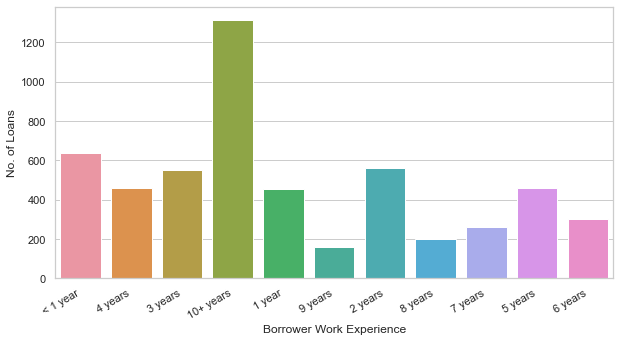

In [41]:
plt.figure(figsize=(10,5))
ax=sns.countplot(charged_off_loans['emp_length'])
ax.set(xlabel='Borrower Work Experience', ylabel='No. of Loans')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")

**Insights from the above graph**

Max no. of loans are charged off for people having 10+ years of experience. 

**Home Ownership vs Count of charged off loans**

[Text(0.5, 0, 'Home Ownership'), Text(0, 0.5, 'No. of Loans')]

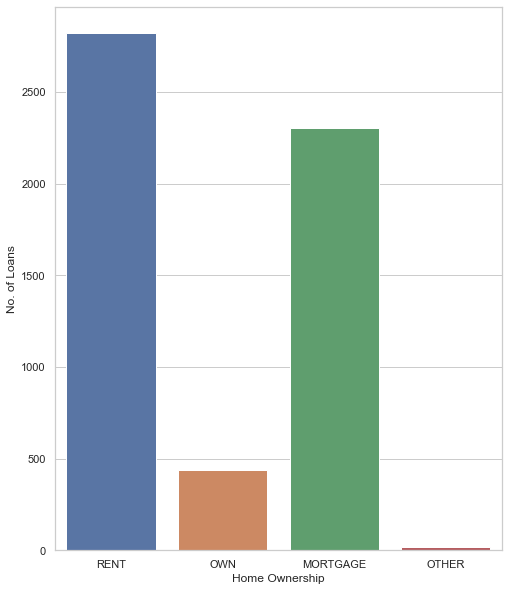

In [43]:
plt.figure(figsize=(8,10))
ax = sns.countplot(charged_off_loans['home_ownership'])
ax.set(xlabel='Home Ownership', ylabel='No. of Loans')

**Insights from the above graph**

Max no. of loans are charged off for people who are living on rent. 

**Loan Status vs Loan Amount of charged off loans**

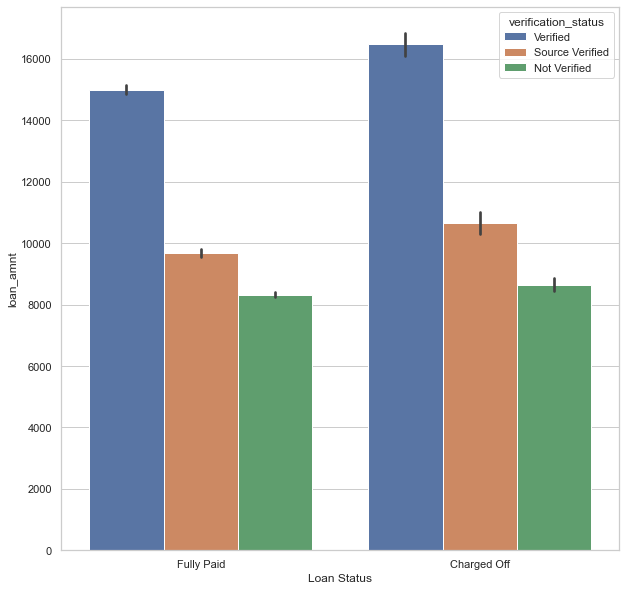

In [44]:
plt.figure(figsize=(10,10))
sns.barplot(x='loan_status',y='loan_amnt', hue='verification_status', data=loan)
plt.xlabel("Loan Status")
plt.show()

**Insights from the above graph**

Max no. of loans are charged off where verification status is **Verified**. 

**Year Wise and Month Wise Distribution of charged-off and fully paid loans**

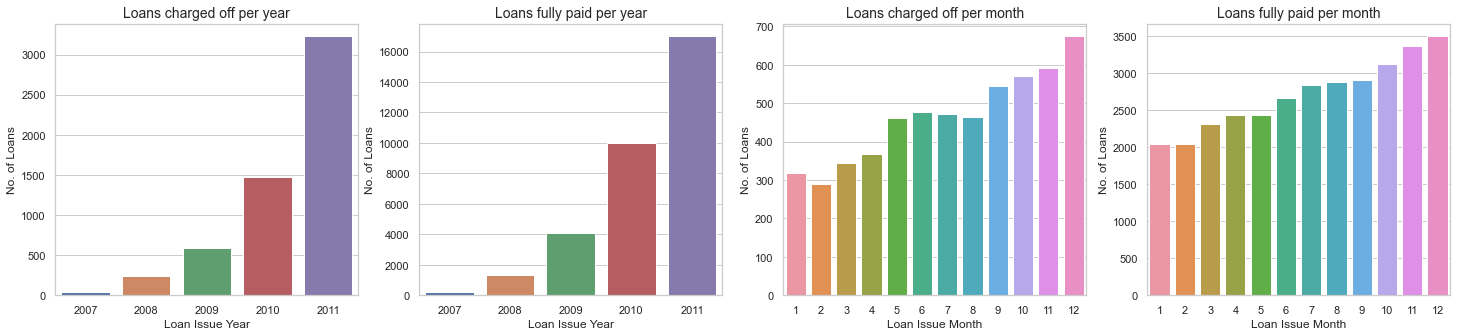

In [45]:
#year wise distribution of loans that are charged off
plt.figure(figsize=(25,5))
plt.subplot(1, 4, 1)
ax1=sns.countplot(charged_off_loans['issue_d_year'], order=sorted(charged_off_loans.issue_d_year.unique()))
ax1.set_title('Loans charged off per year', fontsize=14)
ax1.set(xlabel='Loan Issue Year', ylabel='No. of Loans')

#month wise distribution of loans that are fully paid
plt.subplot(1, 4, 2)
ax2=sns.countplot(fully_paid_loans['issue_d_year'], order=sorted(fully_paid_loans.issue_d_year.unique()))
ax2.set_title('Loans fully paid per year', fontsize=14)
ax2.set(xlabel='Loan Issue Year', ylabel='No. of Loans')

#month wise distribution of loans that are charged off
plt.subplot(1, 4, 3)
ax3=sns.countplot(charged_off_loans['issue_d_month'], order=sorted(charged_off_loans.issue_d_month.unique()))
ax3.set_title('Loans charged off per month', fontsize=14)
ax3.set(xlabel='Loan Issue Month', ylabel='No. of Loans')

#month wise distribution of loans that are fully paid
plt.subplot(1, 4, 4)
ax4=sns.countplot(fully_paid_loans['issue_d_month'], order=sorted(fully_paid_loans.issue_d_month.unique()))
ax4.set_title('Loans fully paid per month', fontsize=14)
ax4.set(xlabel='Loan Issue Month', ylabel='No. of Loans')

plt.show()

**Insights from the above graph**

1. No. of loans, fully paid and charged off are increasing every year. They are at maximum in the year **2011**. This is a very positive trend for Lending Club as the requirement of loans are increasing by each year.
2. The month-wise trend shows that most loans are fully paid as well as charged off as the year comes to an end, maximum in the month of **December** clearly stating the importance of year-end.

**term-wise distribution of charged-off and fully paid loans vs loan amount**

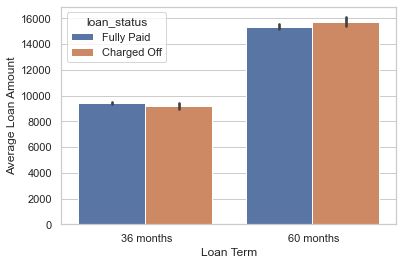

In [47]:
ax = sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=loan, estimator=np.mean)
ax.set(xlabel='Loan Term', ylabel='Average Loan Amount')
plt.show()

**Insights from the above graph**

1. The average loan amount is similar for both the terms for both loan status.  
2. The average loan amount is higher for the 60 month term.

**Term wise Distribution of interest rate**

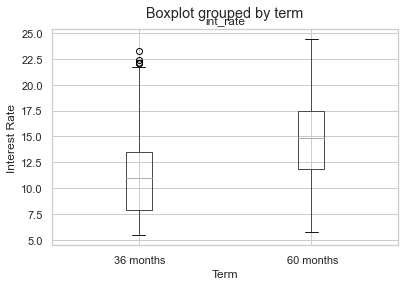

In [50]:
ax = loan.boxplot(column='int_rate', by='term')
ax.set(xlabel='Term', ylabel='Interest Rate')
plt.show()

**Insights from the above graph**

1. The interest rates are higher for 60 month term. 

**b. Bivariate Analysis**

In [53]:
def crosstab(df,col):
    '''
    df : Dataframe
    col: Column Name
    '''
    crosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    crosstab['Percentage_Charged Off'] = round(((100*crosstab['Charged Off'])/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    return crosstab

In [54]:
# Probability of charge off
def bivariate_prob(df,col,stacked= True):
    '''
    df      : Dataframe
    col     : Column Name
    stacked : True(default) for Stacked Bar
    '''
    # get dataframe from crosstab function
    plotCrosstab = crosstab(df,col)
    
    linePlot = plotCrosstab[['Percentage_Charged Off']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Percentage Charge Off',fontsize=20,weight="bold")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Percentage of Charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    ax2.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    plt.show()

**Purpose of loan w.r.t % of loans charged off and no. of loan applicants**

loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
purpose,,,,
car,160,1337,1497,10.688
credit_card,540,4442,4982,10.839
debt_consolidation,2747,15116,17863,15.378
educational,56,268,324,17.284
home_improvement,340,2466,2806,12.117
house,59,299,358,16.480
major_purchase,220,1915,2135,10.304
medical,106,570,676,15.680
moving,91,480,571,15.937


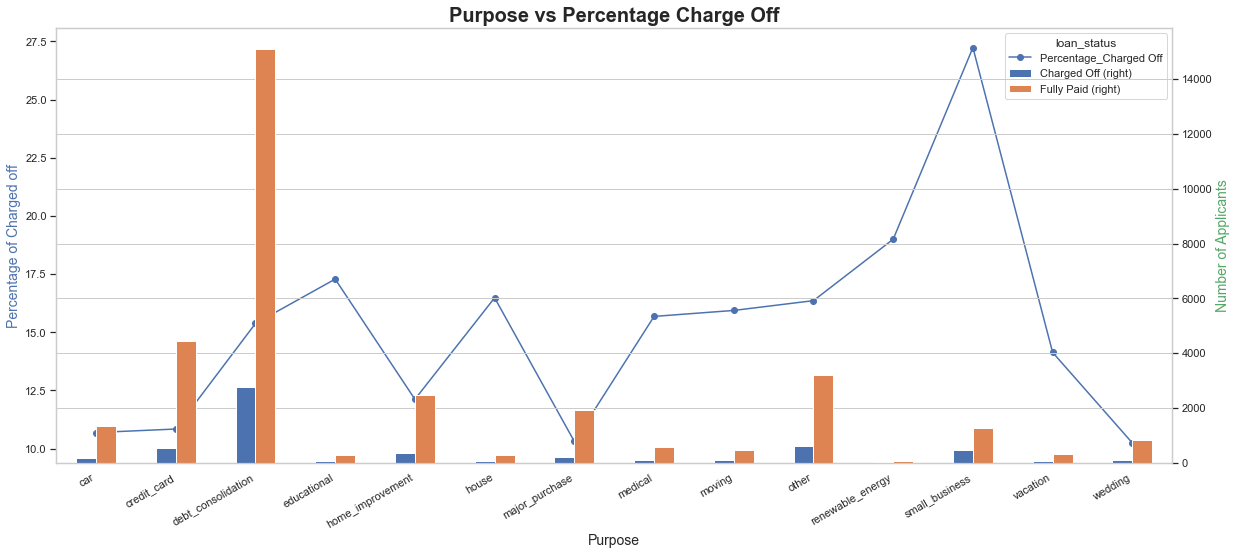

In [55]:
#Plotting the purpose w.r.t % of loans charged off and no. of loan applicants. 
purpose = crosstab(loan,'purpose')
display(purpose)

bivariate_prob(df =loan,col ='purpose',stacked=False) 

Right hand side marker is for number of loan applicants and left hand side marker shows the percentage charged off 

**Insights from the above graph**

1. Maximum no. of loans i.e. 17487 are accepted for the purpose of **Debt Consolidation** out of which 14827 are fully paid and  2660 are charged off i.e. 15.2% <br>
2. Maximum % of a loan being charged off is for the purpose of **small business** and the % is 27.1.

**Loan amount w.r.t % of loans charged off and no. of loan applicants**

In [56]:
#Making bins for Loan Amount
bins = [0, 5000, 10000, 15000, 20000, 25000,30000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000-30000' , '30000 and above']
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'], bins, labels=slot)

loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
loan_amnt_range,,,,
0-5000,1310,8139,9449,13.864
5000-10000,1640,11120,12760,12.853
10000-15000,1052,6605,7657,13.739
15000-20000,746,3568,4314,17.293
20000-25000,536,2256,2792,19.198
25000-30000,138,518,656,21.037
30000 and above,160,378,538,29.740


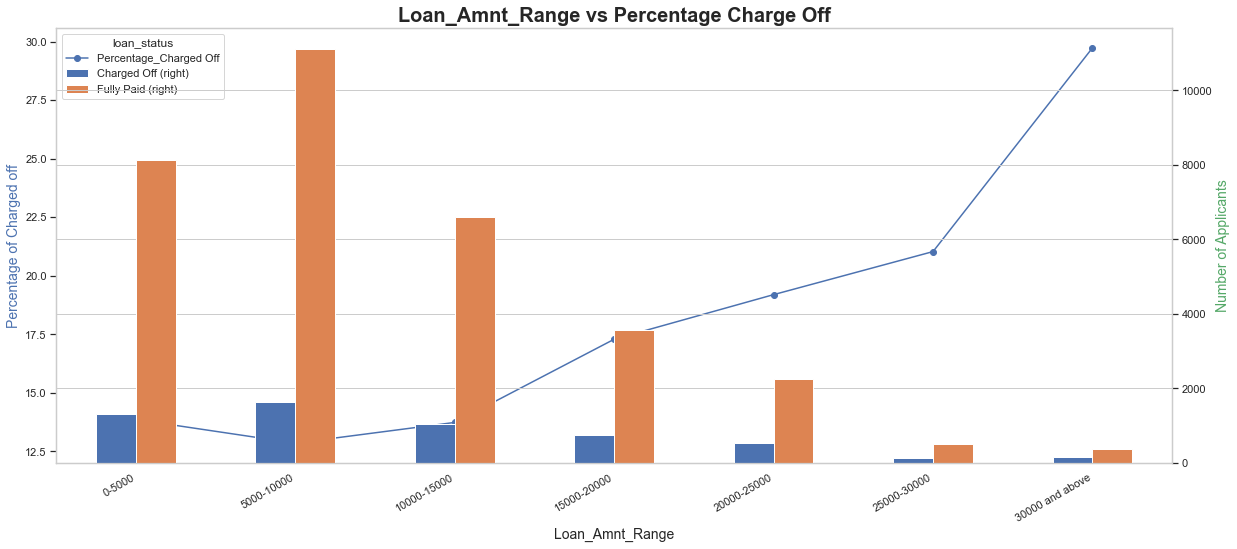

In [57]:
#Plotting the loan amount w.r.t % of loans charged off and no. of loan applicants. 
loan_amnt_range = crosstab(loan,'loan_amnt_range')
display(loan_amnt_range)

bivariate_prob(df =loan,col ='loan_amnt_range',stacked=False) 

**Insights from the above graph**

1. As the **loan amount** increases, The probablity of loan being charged off increases. It is maximum, **29.47%** for the amount of **30,000+** <br>
2. The maximum no. of loans, **12410** are applied where the **loan amount** ranges between 5000 and 10000. <br>

**Annual Income Range w.r.t % of loans charged off and no. of loan applicants**

In [59]:
#Making bins for annual_inc_range
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loan['annual_inc_range'] = pd.cut(loan['annual_inc'], bins, labels=slot)

loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
annual_inc_range,,,,
0-25000,488,2062,2550,19.137
25000-50000,2125,10714,12839,16.551
50000-75000,1681,9965,11646,14.434
75000-100000,730,5251,5981,12.205
100000 and above,558,4592,5150,10.835


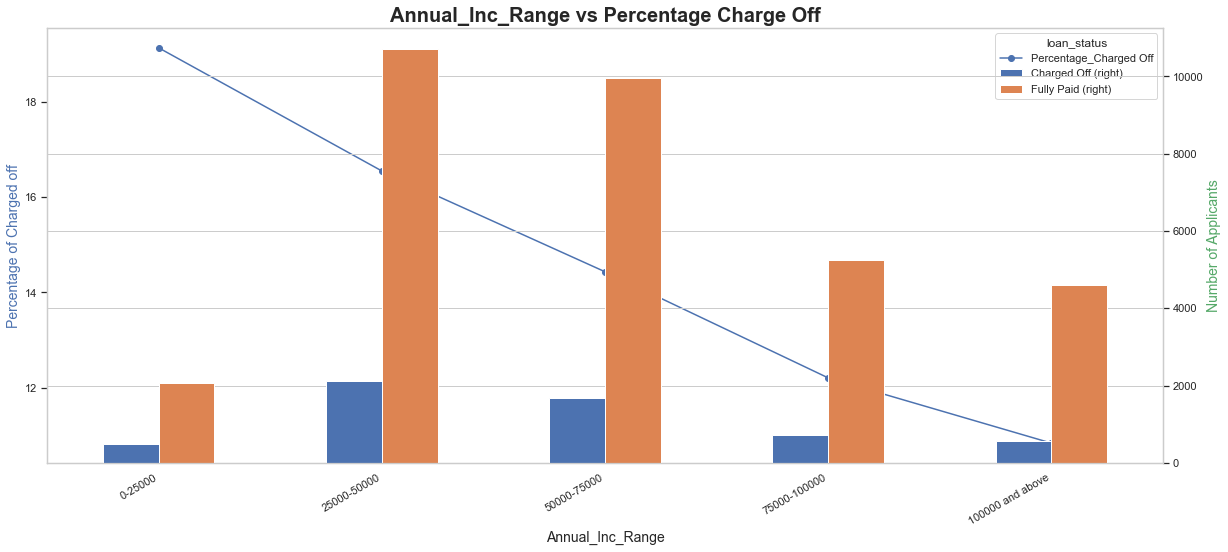

In [60]:
#Plotting the annual_inc_range w.r.t % of loans charged off and no. of loan applicants. 
annual_inc_range = crosstab(loan,'annual_inc_range')
display(annual_inc_range)

bivariate_prob(df =loan,col ='annual_inc_range',stacked=False) 

**Insights from the above graph**

1. As the Annual Income is increasing, The % of loan getting charged off is decreasing.It is minimum for income more than 100000 and maximum where annual income less than 25000. <br>
2. Maximum loans are applied by applicants whose annual income is between 25000 and 75000.

**Interest Rate w.r.t % of loans charged off and no. of loan applicants**

In [62]:
#Making bins for interest range
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
loan['int_rate_range'] = pd.cut(loan['int_rate'], bins, labels=slot)

loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
int_rate_range,,,,
0-7.5,255,5094,5349,4.767
7.5-10,572,6300,6872,8.324
10-12.5,1223,8083,9306,13.142
12.5-15,1468,7331,8799,16.684
15 and above,1774,5317,7091,25.018


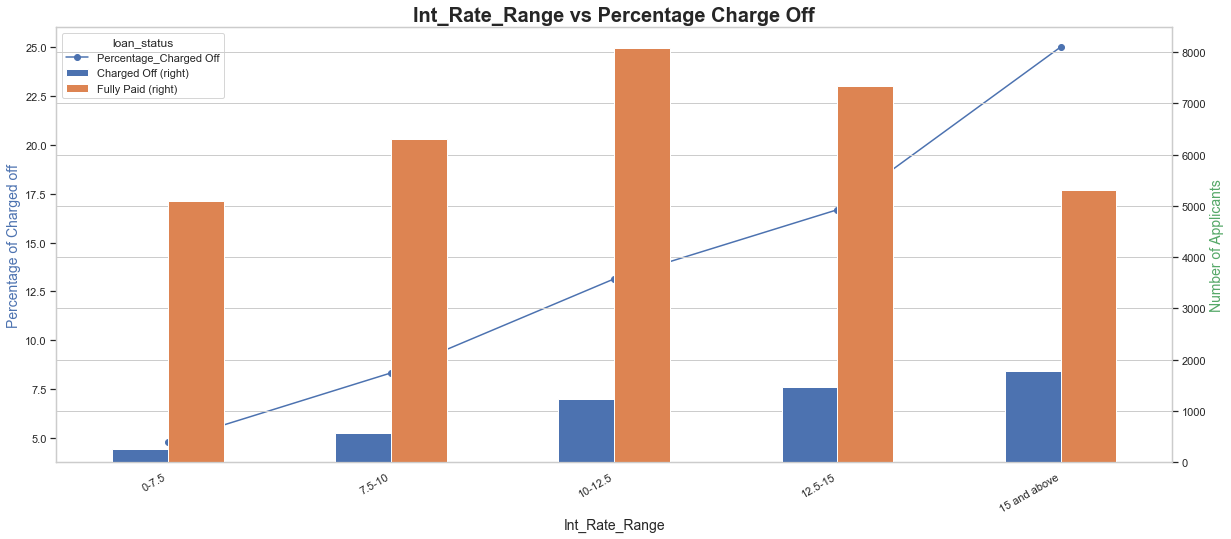

In [63]:
#Plotting the int_rate_range w.r.t % of loans charged off and no. of loan applicants. 
int_rate_range = crosstab(loan,'int_rate_range')
display(int_rate_range)

bivariate_prob(df =loan,col ='int_rate_range',stacked=False) 

**Insights from the above graph**

1. As the Interest Rate is increasing, The % of loan getting charged off is also increasing.It is minimum for interest rate below 7.5. <br>
2. Maximum loans are applied by applicants where the interest rate is between 10 and 15%. <br>

**Grade w.r.t % of loans charged off and no. of loan applicants**

loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
grade,,,,
A,601,9368,9969,6.029
B,1415,10168,11583,12.216
C,1338,6416,7754,17.256
D,1109,3899,5008,22.145
E,706,1895,2601,27.143
F,315,647,962,32.744
G,98,191,289,33.910


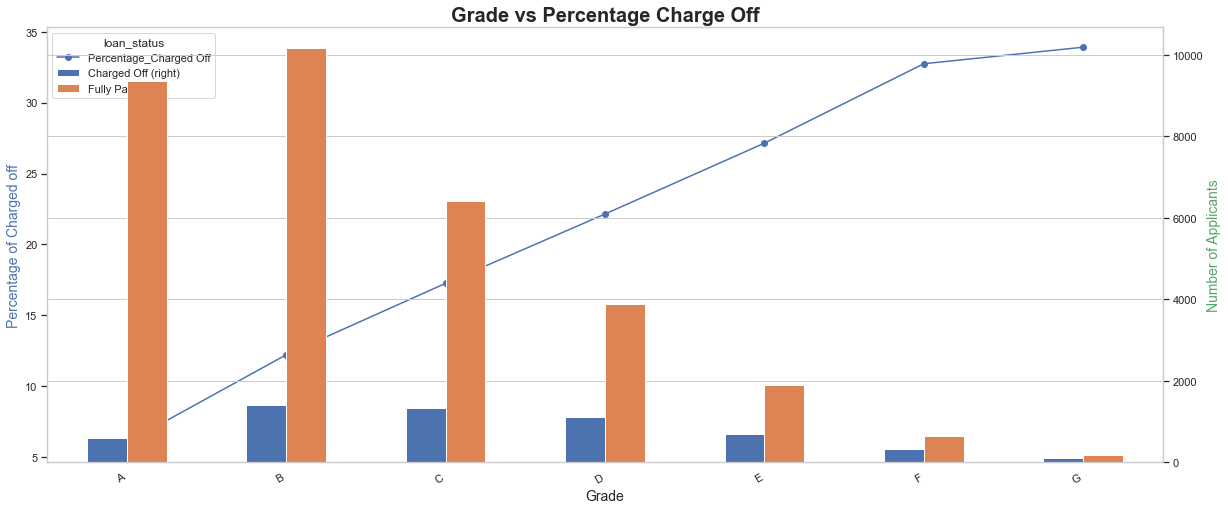

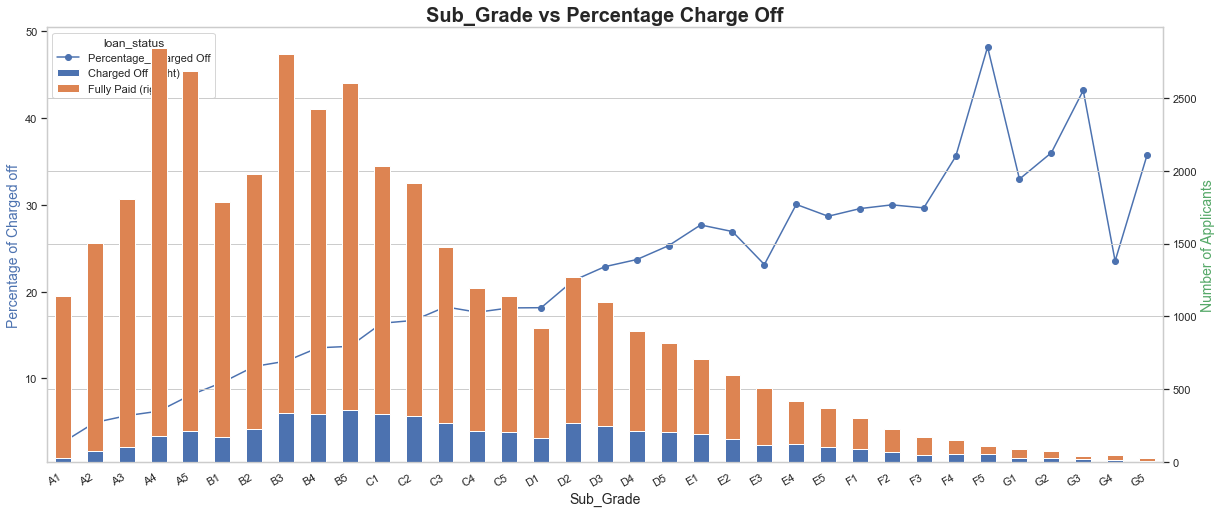

In [66]:
#Plotting the grade w.r.t % of loans charged off and no. of loan applicants. 
grade = crosstab(loan,'grade')
display(grade)

bivariate_prob(df =loan,col ='grade',stacked=False) 
#Plotting the sub grade w.r.t % of loans charged off and no. of loan applicants.
bivariate_prob(df =loan,col ='sub_grade')

**Insights from the above graph**

1. Grade **A and B**  loans are **safe**. Within these the sub-grades **A4 and B3** have the highest number of loan applicants. <br>
2. Grade  **E, F, G**  loans are less safe as compared to others.

**Term w.r.t % of loans charged off and no. of loan applicants**

loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
term,,,,
36 months,3192,25555,28747,11.104
60 months,2390,7029,9419,25.374


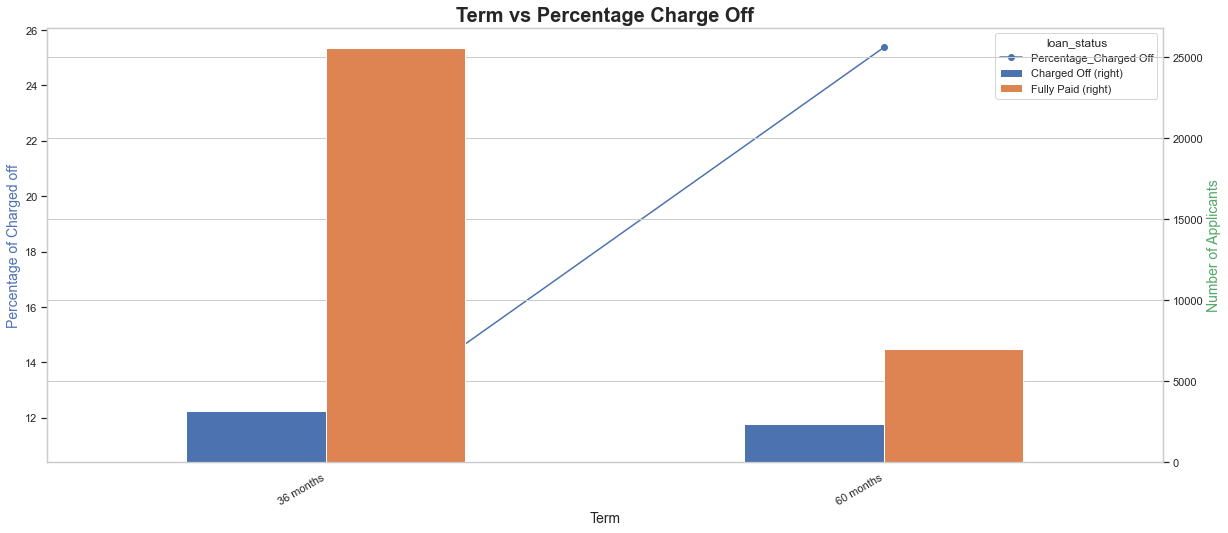

In [67]:
#Plotting the term w.r.t % of loans charged off and no. of loan applicants. 
term = crosstab(loan,'term')
display(term)

bivariate_prob(df =loan,col ='term',stacked=False)

**Insights from the above graph**

1. % of loans getting charged-off for 60 month term i.i. **25.2%** is higher as compared to 36 month term i.e. **10.9%** <br>
2. Total no. of loan applications are very high for 36 month term as compared to 60 month term.

**Address State w.r.t % of loans charged off and no. of loan applicants**

In [68]:
filter_states = loan.addr_state.value_counts()
filter_states = filter_states[(filter_states < 10)]

loan_filter_states = loan.drop(labels = loan[loan.addr_state.isin(filter_states.index)].index)

loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
addr_state,,,,
AK,14,61,75,18.667
AL,54,376,430,12.558
AR,27,207,234,11.538
AZ,122,719,841,14.507
CA,1115,5761,6876,16.216
CO,98,653,751,13.049
CT,94,618,712,13.202
DC,15,195,210,7.143
DE,12,101,113,10.619


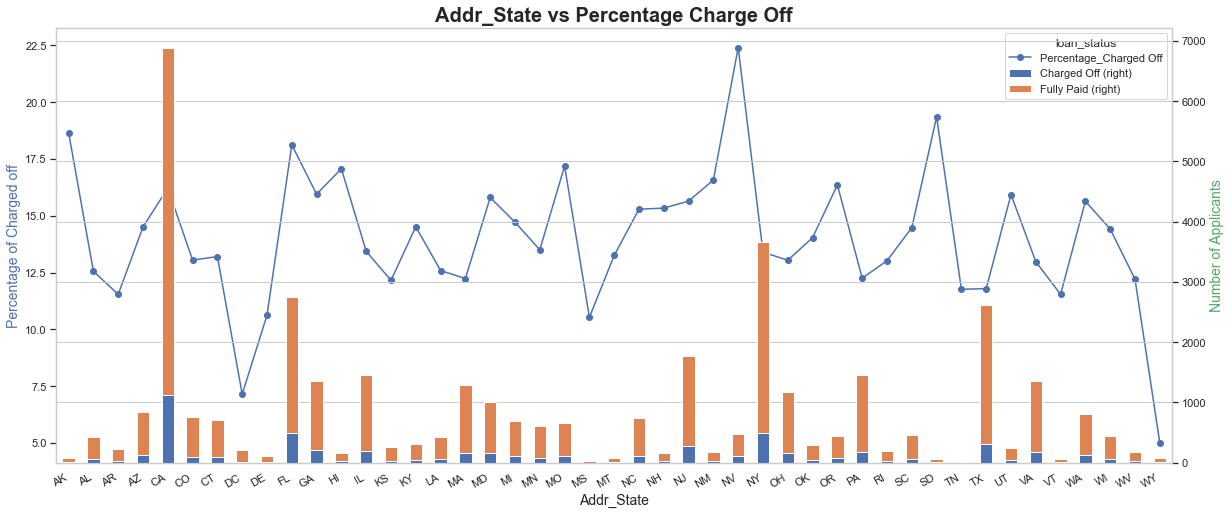

In [69]:
states = crosstab(loan_filter_states,'addr_state')
display(states)

bivariate_prob(df =loan_filter_states,col ='addr_state')

**Insights from the above graph**

1. Maximum no. of loans are applied by people from CA.
2. Maximum no. of loans are charged off for people of NV.

**Term wise and year wise comaprison of interest rate of fully paid and charged off loans**

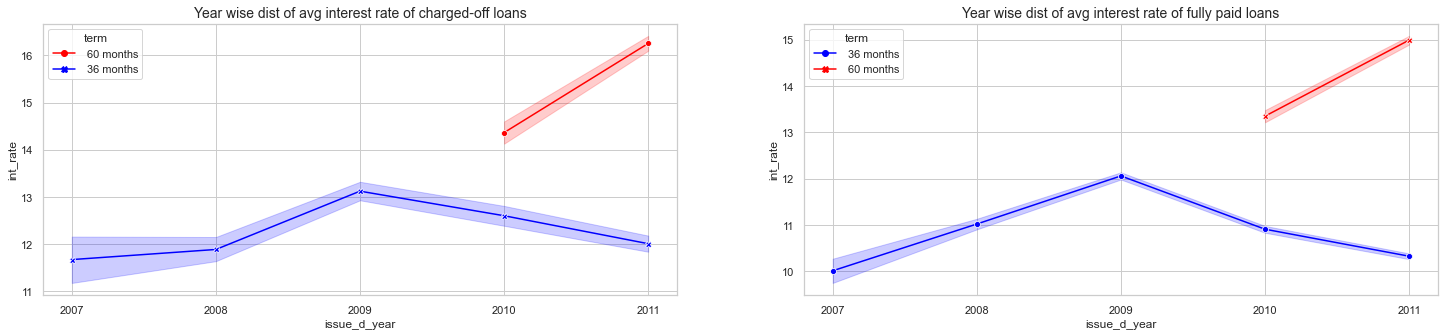

In [71]:
plt.figure(figsize=(25,5))
plt.subplot(1, 2, 1)
palette ={" 60 months":"red"," 36 months":"blue"}
ax1=sns.lineplot(x="issue_d_year", y="int_rate", data=charged_off_loans, hue='term',style="term",markers=True, dashes=False,palette=palette)
ax1.locator_params(integer=True)
ax1.set_title('Year wise dist of avg interest rate of charged-off loans', fontsize=14)

plt.subplot(1, 2, 2)
ax2=sns.lineplot(x="issue_d_year", y="int_rate", data=fully_paid_loans, hue='term',style="term",markers=True, dashes=False,palette=palette)
ax2.set_title('Year wise dist of avg interest rate of fully paid loans', fontsize=14)
ax2.locator_params(integer=True)

**Insights from the above graph**

1. Avg Interest Rate is increasing for charged off and fully paid loans year-wise in 36 month term but after inclusion of 60 months term in 2010, Avg Interest Rate decreaesd significantly for charged off and fully paid loans. <br>
2. 60 month term was introduced in 2010. <br>
3. Avg interest rate is higher for 60 month term. 

**Trend of Interest rate of fully paid and charged off loans across purpose**

ValueError: The number of FixedLocator locations (15), usually from a call to set_ticks, does not match the number of ticklabels (14).

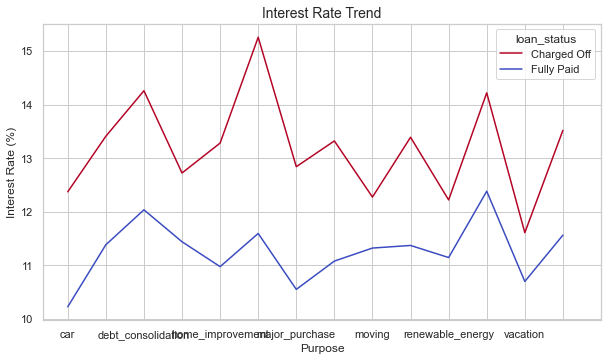

In [72]:
fig = plt.figure(figsize=(10,12))
cmap = plt.cm.coolwarm_r
ax3 = fig.add_subplot(212)
by_interest = loan.groupby(['purpose', 'loan_status']).int_rate.mean()
by_interest.unstack().plot(ax=ax3, colormap=cmap)
ax3.set_title('Interest Rate Trend', fontsize=14)
ax3.set_ylabel('Interest Rate (%)', fontsize=12)
ax3.set_xlabel('Purpose', fontsize=12)


# get the values we want displayed as tick labels
tick_labels = tuple(loan['purpose'].unique())
# get the positions for the maximum xtick label
x_max = int(max(plt.xticks()[0]))  # int() to convert numpy.int32 => int
# manually set you xtick labels
plt.xticks(range(0, x_max + 1), tick_labels, rotation=90) 
plt.figure(1).subplots_adjust(
    **dict(left=0.1, right=.8, bottom=.15, top=.9, wspace=.1, hspace=.1))
for line in ax3.lines:
    line.set_linewidth(0.5)

**Insights from above graph**

1. Interest Rate is higher for charged off loans across all purposes.

**Term wise and year wise comaprison of loan amount of fully paid and charged off loans**

[Text(0.5, 0, 'Loan Issue Year'), Text(0, 0.5, 'Loan Amount')]

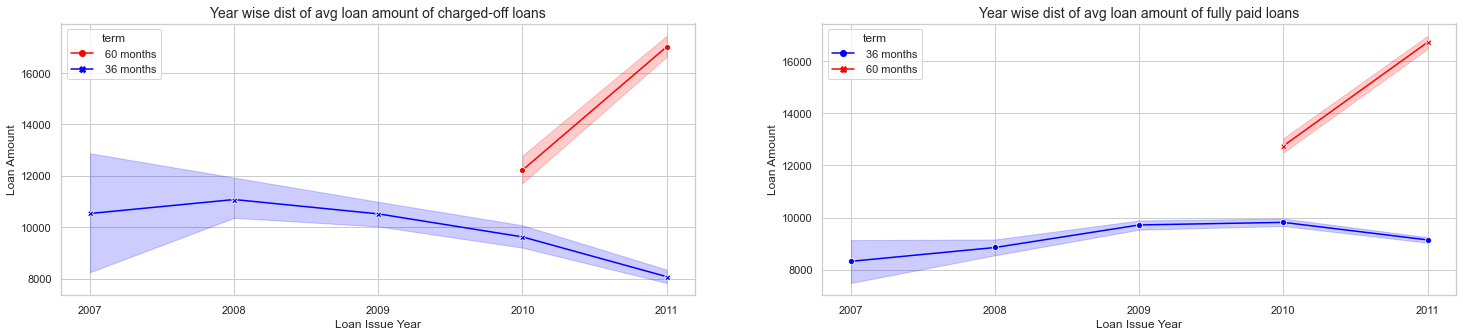

In [73]:
plt.figure(figsize=(25,5))
plt.subplot(1, 2, 1)
palette ={" 60 months":"red"," 36 months":"blue"}
ax1=sns.lineplot(x="issue_d_year", y="loan_amnt", data=charged_off_loans, hue='term',style="term",markers=True, dashes=False,palette=palette)
ax1.locator_params(integer=True)
ax1.set_title('Year wise dist of avg loan amount of charged-off loans', fontsize=14)
ax1.set(xlabel='Loan Issue Year', ylabel='Loan Amount')

plt.subplot(1, 2, 2)
ax2=sns.lineplot(x="issue_d_year", y="loan_amnt", data=fully_paid_loans, hue='term',style="term",markers=True, dashes=False,palette=palette)
ax2.set_title('Year wise dist of avg loan amount of fully paid loans', fontsize=14)
ax2.locator_params(integer=True)
ax2.set(xlabel='Loan Issue Year', ylabel='Loan Amount')

**Insights from the above graph**

1. Avg Loan Amount is decreasing every year for charged off loans in 36 month term  <br>
2. Avg Loan Amount is increasing every year for fully paid loans in 36 month term till 2010. It decreases slightly in 2011 <br>
3. Avg Loan Amount is increasing for 60 month term for both fully paid and charged off loans. 

In [75]:
loan_correlation = loan.corr()
loan_correlation

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,issue_d_month,issue_d_year
loan_amnt,1.000000,0.980910,0.934530,0.301604,0.929576,0.405165,0.070610,0.048989,0.099237
funded_amnt,0.980910,1.000000,0.953504,0.306313,0.956419,0.400693,0.070330,0.038417,0.110219
funded_amnt_inv,0.934530,0.953504,1.000000,0.298806,0.899272,0.381836,0.078773,0.065483,0.246019
int_rate,0.301604,0.306313,0.298806,1.000000,0.278532,0.066618,0.113242,0.025804,0.036761
installment,0.929576,0.956419,0.899272,0.278532,1.000000,0.403090,0.060943,0.025338,0.037657
annual_inc,0.405165,0.400693,0.381836,0.066618,0.403090,1.000000,-0.116450,0.012997,0.024761
dti,0.070610,0.070330,0.078773,0.113242,0.060943,-0.116450,1.000000,0.015129,0.092253
issue_d_month,0.048989,0.038417,0.065483,0.025804,0.025338,0.012997,0.015129,1.000000,-0.036580
issue_d_year,0.099237,0.110219,0.246019,0.036761,0.037657,0.024761,0.092253,-0.036580,1.000000


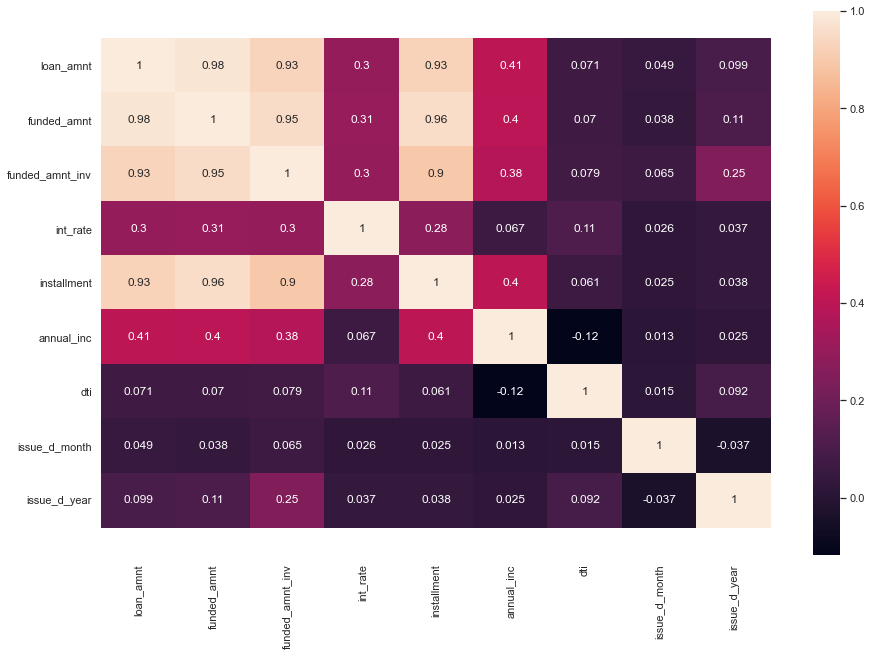

In [76]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)

# fix for mpl bug that cuts off top/bottom of seaborn
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

1. Loan Amount, Funded Amount, Funded Amount invested and installment are highly correlated with each other.
2. Annual Income is negatively correlated with DTI.

**Recommendations** <br>
1. Lending Club should be wary of the loans where the purpose is **Small Business** as the percentage of a loan being charged off is maximum **27.1%**. Accepting loans for the purpose of **Weddings,major purchase, car and credit card** is highly recommended. <br>
2. Higher the loan amount, the higher the chances of loan being charged off. Therefore Lending Company should consider accepting loans of lower amount.The maximum no. of loans, **12410** are applied where the **loan amount** ranges between 5000 and 10000. For this range the probablity of the the loan getting charged off is very less. Hence the risk factor is low for lending club. <br>
3. Lending Club should consider accepting more loans from applicants whose annual income is **greater than 100000** as their probablity of charge off is minimum. <br>
4. Lending Club should consider accepting more loans where interest rate is **less than 7.5%** as their probablity of charge off is minimum.<br>
5. Lending Club should consider accepting more loans of grade **A and B**. It should be cautious of loans falling in grades **E,F and G**
6. Lending Club should consider accepting more loans from people who **owns** a house. <br>
7. The number of loan applicants are increasing with each passing year bringing more business to Lending Club which is leading to more loans getting accepted as well as more loans getting charged off. Moreover the last few months of the year are quite critical as most of the loans are either fully paid or charged off at that time.  <br>
8. Lending Club should accept more loans for the term of **36 months** as the % of charged off loans is less and the no. of loan applicants are more. Also the avg fully paid loan amount is increasing over the years and avg charged off lon amount is decreasing over the years. <br>